In [54]:
import os
import numpy as np
import random
import torch
import torchvision
import torch.nn as nn
from sklearn.utils import resample
from torchvision import transforms
from tqdm import tqdm
from PIL import Image
import glob
from copy import deepcopy
import matplotlib.pyplot as plt




seed = 20200220
torch.manual_seed(seed)
random.seed(seed)
np.random.seed(seed)
# Generator object for DataLoader random batching
g_cpu = torch.Generator()
g_cpu.manual_seed(seed)
1
# Checking for GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'

transformation = transforms.Compose([
        transforms.Resize((244,244)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])

transform_norm = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])



<PIL.Image.Image image mode=RGB size=500x500 at 0x7F0B7D71CCA0>
[[[167 205 224]
  [167 205 224]
  [167 205 224]
  ...
  [169 200 221]
  [169 200 221]
  [169 200 221]]

 [[167 205 224]
  [167 205 224]
  [167 205 224]
  ...
  [169 200 221]
  [169 200 221]
  [169 200 221]]

 [[168 205 224]
  [168 205 224]
  [168 205 224]
  ...
  [169 200 221]
  [169 200 221]
  [169 200 221]]

 ...

 [[122 112  61]
  [124 112  62]
  [124 110  63]
  ...
  [141 107  61]
  [137 103  57]
  [133  99  53]]

 [[124 114  63]
  [126 114  64]
  [127 113  66]
  ...
  [133  99  53]
  [129  95  49]
  [125  91  45]]

 [[122 112  61]
  [125 113  63]
  [125 111  64]
  ...
  [128  94  48]
  [124  90  44]
  [121  87  41]]]
tensor([[[0.6549, 0.6549, 0.6549,  ..., 0.6627, 0.6627, 0.6627],
         [0.6549, 0.6549, 0.6549,  ..., 0.6627, 0.6627, 0.6627],
         [0.6588, 0.6588, 0.6588,  ..., 0.6627, 0.6627, 0.6627],
         ...,
         [0.4784, 0.4863, 0.4863,  ..., 0.5529, 0.5373, 0.5216],
         [0.4863, 0.4941, 0.4980

Text(0.5, 1.0, 'distribution of pixels')

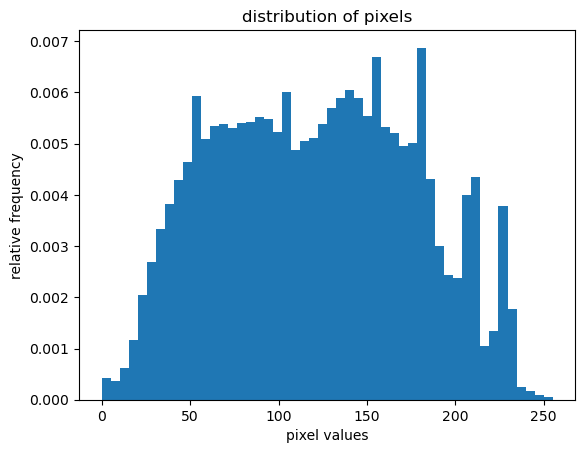

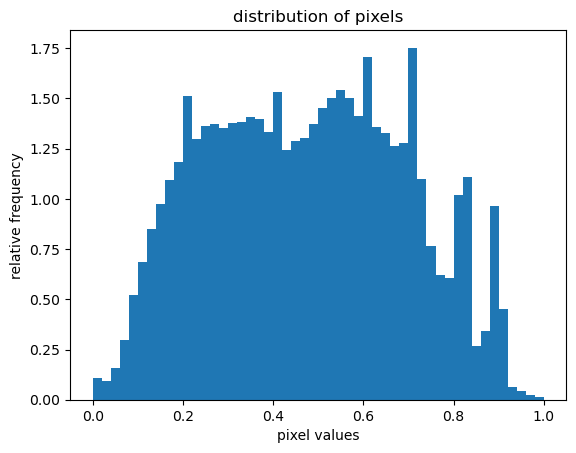

In [47]:

image_path = os.path.join(os.getcwd() + '/eeg_dataset', 'images', 'training_images', '00014_aloe', 'aloe_06s.jpg')
img = Image.open(image_path).convert('RGB')
img_np_not = np.array(img)
print (img_np_not)
img = transformation(img)
img_np = np.array(img)
print (img)
 
# plot the pixel values
plt.hist(img_np_not.ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")

plt.figure()
plt.hist(img_np.ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")

(500, 500, 3)
torch.Size([3, 500, 500])
torch.Size([3, 500, 500])
tensor([[[0.6549, 0.6549, 0.6549,  ..., 0.6627, 0.6627, 0.6627],
         [0.6549, 0.6549, 0.6549,  ..., 0.6627, 0.6627, 0.6627],
         [0.6588, 0.6588, 0.6588,  ..., 0.6627, 0.6627, 0.6627],
         ...,
         [0.4784, 0.4863, 0.4863,  ..., 0.5529, 0.5373, 0.5216],
         [0.4863, 0.4941, 0.4980,  ..., 0.5216, 0.5059, 0.4902],
         [0.4784, 0.4902, 0.4902,  ..., 0.5020, 0.4863, 0.4745]],

        [[0.8039, 0.8039, 0.8039,  ..., 0.7843, 0.7843, 0.7843],
         [0.8039, 0.8039, 0.8039,  ..., 0.7843, 0.7843, 0.7843],
         [0.8039, 0.8039, 0.8039,  ..., 0.7843, 0.7843, 0.7843],
         ...,
         [0.4392, 0.4392, 0.4314,  ..., 0.4196, 0.4039, 0.3882],
         [0.4471, 0.4471, 0.4431,  ..., 0.3882, 0.3725, 0.3569],
         [0.4392, 0.4431, 0.4353,  ..., 0.3686, 0.3529, 0.3412]],

        [[0.8784, 0.8784, 0.8784,  ..., 0.8667, 0.8667, 0.8667],
         [0.8784, 0.8784, 0.8784,  ..., 0.8667, 0.8667, 0

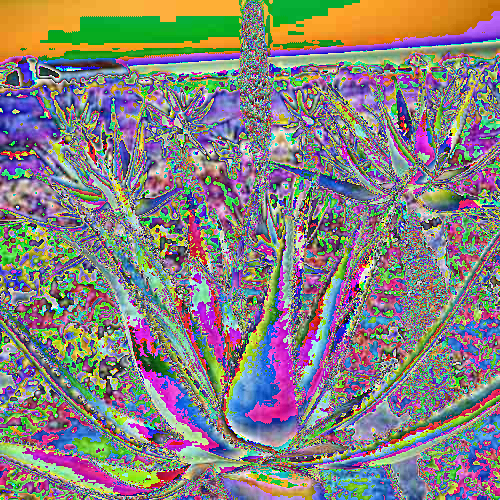

In [55]:
from torchvision.transforms import functional as F
img_normalized = img_np.transpose(1, 2, 0)
img_nor = transform_norm(img_normalized)

# plt.imshow(img_normalized)
print (np.shape(img_normalized))
print (np.shape(img))
print (np.shape(img_nor))
print (img)
print (img_nor)
print (img_normalized)
# plt.xticks([])
# plt.yticks([])
F.to_pil_image(img_nor)

In [5]:
print (img_nor)

tensor([[[ 0.7419,  0.7419,  0.7419,  ...,  0.7762,  0.7762,  0.7762],
         [ 0.7591,  0.7591,  0.7591,  ...,  0.7591,  0.7591,  0.7591],
         [ 0.7933,  0.7933,  0.7933,  ...,  0.7419,  0.7419,  0.7419],
         ...,
         [-0.4911, -0.3198, -0.4568,  ...,  0.5707,  0.6906,  0.6906],
         [-0.0801, -0.0801, -0.2513,  ...,  0.3138,  0.3994,  0.3138],
         [ 0.0056, -0.0116, -0.1657,  ...,  0.1083,  0.1426,  0.0569]],

        [[ 1.5532,  1.5532,  1.5532,  ...,  1.4657,  1.4657,  1.4657],
         [ 1.5707,  1.5707,  1.5707,  ...,  1.4482,  1.4482,  1.4482],
         [ 1.5707,  1.5707,  1.5707,  ...,  1.4307,  1.4307,  1.4307],
         ...,
         [-0.5651, -0.4076, -0.5476,  ..., -0.0224,  0.0651,  0.0651],
         [-0.1625, -0.2500, -0.5476,  ..., -0.1975, -0.1099, -0.1800],
         [-0.0574, -0.1625, -0.4951,  ..., -0.3901, -0.3200, -0.4076]],

        [[ 2.0997,  2.0997,  2.0997,  ...,  2.0474,  2.0474,  2.0474],
         [ 2.1171,  2.1171,  2.1171,  ...,  2

In [61]:
def validation_strat(n_samples = 100):

    train_img_concepts = np.arange(1654)
    img_per_concept = 10
    val_concepts = np.sort(resample(train_img_concepts, replace=False,
        n_samples=n_samples))
    idx_val = np.zeros((len(train_img_concepts)*img_per_concept), dtype=bool)
    for i in val_concepts:
        idx_val[i*img_per_concept:i*img_per_concept+img_per_concept] = True

    return idx_val

def limit_samples(idx_val, n_samples = 560):
    train_img_concepts = np.arange(1654)
    img_per_concept = 10
    val_concepts = np.sort(resample(train_img_concepts, replace=False,
        n_samples=n_samples))
    
    samples = np.zeros((len(train_img_concepts)*img_per_concept), dtype=bool)
    for i in val_concepts:
        if idx_val[i*img_per_concept:i*img_per_concept+img_per_concept].all() == True:
            pass
        else: 
            samples[i*img_per_concept:i*img_per_concept+img_per_concept] = True
    return samples

def all_idx(idx_val, limit_samples):
    
    train_img_concepts = np.arange(1654)
    img_per_concept = 10
    all_idx = np.zeros((len(train_img_concepts)*img_per_concept), dtype=bool)
    
    for (i, d) in enumerate(idx_val): 
        if d == True: 
            all_idx[i] = True
            
    for (i, d) in enumerate(limit_samples): 
        if d == True: 
            all_idx[i] = True
    
    return all_idx

def paths_to_npy(path, test_data = False):
    """
    :return: EEG Test paths, Training paths.
    """
    
    if test_data:
        return glob.glob(path + "/sub-**/*_test.npy", recursive=True)

    return glob.glob(path + "/sub-**/*_training.npy", recursive=True)

def paths_to_subjects(path = os.getcwd() + '/eeg_dataset' + '/preprocessed'):
    return glob.glob(path + "/sub-**", recursive = True)

idx_val = validation_strat()
limit_samples = limit_samples(idx_val)
all_idx = all_idx(idx_val, limit_samples)




In [62]:
''' A bunch of sanity checkers, ignore!'''

# print (np.count_nonzero(all_idx == False))
# print (np.count_nonzero(limit_samples == False))
# print (np.count_nonzero(idx_val == False))
# print (len(all_idx==limit_samples))
# print (len(all_idx==idx_val))

# all_idx_true = 0
# same_as_val = 0
# same_as_sample = 0

# for i in range(16540):
#     if all_idx[i] == True:
#         all_idx_true += 1
#         if all_idx[i] ==  idx_val[i]:
#             same_as_val += 1
#         elif all_idx[i] == limit_samples[i]:
#             same_as_sample += 1
#         else:
#             pass

# print (all_idx_true)
# print (same_as_val)
# print (same_as_sample)

' A bunch of sanity checkers, ignore!'

16540*4*17*100
16540*17*100

# Stats to back up the rationale for or against mean

In [63]:
def collate_images_dataset(idx_val, reduce = False, limit_samples = False, data_dir = '/eeg_dataset', transform = None):

    img_dirs = os.path.join(os.getcwd() + data_dir, 'images', 'training_images')

    image_paths = []
    for root, dirs, files in os.walk(img_dirs):
        for file in files:
            if file.endswith(".jpg"):
                image_paths.append(os.path.join(root,file))
                
    image_paths.sort()

    if reduce: 
        reduced = []
    train = []
    val = []
    for i, image in enumerate(tqdm(image_paths, desc = 'Training and validation images loading...')):
        if idx_val[i] == True:
            img = Image.open(image).convert('RGB')
            img = transformation(img)
            val.append(img)
        elif reduce:
            if limit_samples[i] == True: 
                img = Image.open(image).convert('RGB')
                img = transformation(img)
                reduced.append(img)
        else:
            img = Image.open(image).convert('RGB')
            img = transformation(img)
            train.append(img)

        


    img_dirs = os.path.join(os.getcwd() + data_dir, 'images', 'test_images')

    image_paths = []

    for root, dirs, files in os.walk(img_dirs):
        for file in files:
            if file.endswith(".jpg"):
                image_paths.append(os.path.join(root,file))

    image_paths.sort()
    test = []
    for image in tqdm(image_paths, desc = 'Test images loading...'):
        img = Image.open(image).convert('RGB')
        img = transformation(img)
        test.append(img)

    if reduce: 
        return reduced, val, test
    
    return train, val, test

def collate_participant_eeg(idx_val, reduce = False, limit_samples = False, all_idx = False, participant = None, data_path ='eeg_dataset/preprocessed', sub = '/sub-02', to_torch = False):

    if participant:
        train_file = np.load(participant + '/preprocessed_eeg_training.npy', allow_pickle = True).item()
        test_file = np.load(participant + '/preprocessed_eeg_test.npy', allow_pickle = True).item()
    else:
        train_file = np.load(data_path + sub + '/preprocessed_eeg_training.npy', allow_pickle = True).item()
        test_file = np.load(data_path + sub + '/preprocessed_eeg_test.npy', allow_pickle = True).item()

    print (data_path + sub + '/preprocessed_eeg_training.npy')

    # Train and val
    signal_data = train_file['preprocessed_eeg_data']
    chnames = train_file['ch_names']
    times = train_file['times']
    signal_data = np.mean(signal_data, 1)
    if reduce: 
        signal_data_reduced = signal_data[limit_samples]
        signal_data_val = signal_data[idx_val]
        signal_data = np.delete(signal_data, all_idx, 0)
    else: 
        signal_data_val = signal_data[idx_val]
        signal_data = np.delete(signal_data, idx_val, 0)


    # Test
    signal_data_test = test_file['preprocessed_eeg_data']
    signal_data_test = np.mean(signal_data, 1)

    if to_torch:
        signal_data = torch.tensor(np.float32(signal_data))
        signal_data_val = torch.tensor(np.float32(signal_data_val))
        signal_data_test = torch.tensor(np.float32(signal_data))
        if reduce: 
            signal_data_reduced = torch.tensor(np.float32(signal_data_reduced))
        
    if reduce: 
        return signal_data_reduced, signal_data_val, signal_data_test, chnames, times
    return signal_data, signal_data_val, signal_data_test, chnames, times

In [64]:
from torch.utils.data import DataLoader, Dataset

In [65]:
def create_dataloaders(g_cpu, X_train, X_val, X_test, y_train, y_val, y_test):

    class EegDataset(Dataset):
        def __init__(self, X, y, transformation = None, target_transform = None):
            self.X = X
            self.y = y

        def __len__(self):
            return len(self.y)

        def __getitem__(self, idx):
            image = self.X[idx]
            target = self.y[idx]

            return image, target
        
        def __printself_(self):
            print (self.X)
            print (self.y)

    train_ds = EegDataset(X_train, y_train)
    val_ds = EegDataset(X_val, y_val)
    test_ds = EegDataset(X_test, y_test)

    ### Convert the Datasets to PyTorch's Dataloader format ###
    train_dl = DataLoader(train_ds, batch_size=16, shuffle=True,
        generator=g_cpu)
    val_dl = DataLoader(val_ds, batch_size=val_ds.__len__(), shuffle=False)
    test_dl = DataLoader(test_ds, batch_size=test_ds.__len__(), shuffle=False)

    if len(train_dl) > 0:
        print ('Loaded successfully! ')

    return train_dl, val_dl, test_dl

In [66]:
X_train, X_val, X_test, chnames, times = collate_participant_eeg(idx_val, reduce = True, limit_samples = limit_samples, all_idx = all_idx, to_torch = True)
y_train, y_val, y_test = collate_images_dataset(idx_val, reduce = True, limit_samples = limit_samples)

# X_train, X_val, X_test, chnames, times = collate_participant_eeg(idx_val, to_torch = True)
# y_train, y_val, y_test = collate_images_dataset(idx_val)

eeg_dataset/preprocessed/sub-02/preprocessed_eeg_training.npy


Training and validation images loading...: 100%|█| 16540/16540 [00:31<00:00, 527
Test images loading...: 100%|████████████████| 200/200 [00:00<00:00, 210.72it/s]


In [67]:
train_dl, val_dl, test_dl = create_dataloaders(g_cpu, X_train, X_val, X_test, y_train, y_val, y_test)

Loaded successfully! 


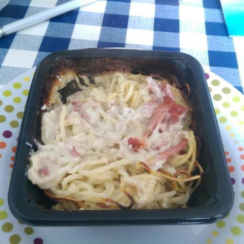

In [22]:
from torchvision.transforms import functional as F


F.to_pil_image(next(iter(train_dl))[1][10])

# Now, for the model training part! 


In [162]:
print (np.shape((next(iter(train_dl))[0])))

torch.Size([16, 17, 100])


In [93]:
import torch
import torch.nn as nn
import torch.optim as optim


input_dim = 100
hidden_dim = 128
latent_dim = 64
image_channels = 3
num_epochs = 100


class Encoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim, image_channels, batch_norm = False):
        super(Encoder, self).__init__()
        
        self.lstm = nn.LSTM(input_size = input_dim, hidden_size = hidden_dim, batch_first = True)
        
        
        

class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim, image_channels):
        super(VAE, self).__init__()

        self.encoder_lstm = nn.LSTM(input_size=input_dim, hidden_size=hidden_dim, batch_first=True)
        self.encoder_fc = nn.Linear(hidden_dim, latent_dim*2)  

        self.decoder_fc = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),  # Added batch norm layer
            nn.ReLU(),
            nn.Linear(hidden_dim, 256*8*8),
            nn.BatchNorm1d(256*8*8)  # Added batch norm layer
        )

        self.decoder_conv = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),  # Added batch norm layer
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(64),  # Added batch norm layer
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(32),  # Added batch norm layer
            nn.ReLU(),
            nn.ConvTranspose2d(32, image_channels, kernel_size=4, stride=2, padding=1),
            nn.Sigmoid()
        )

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def forward(self, x):
        _, (h_n, _) = self.encoder_lstm(x)
        h_n = h_n[-1, :, :]  # Take the output at the final timestep
        h = self.encoder_fc(h_n)
        mu, logvar = torch.chunk(h, 2, dim=-1)
        z = self.reparameterize(mu, logvar)
        z_ = self.decoder_fc(z)
        z_ = z_.view(-1, 256, 8, 8)  
        return self.decoder_conv(z_), mu, logvar


In [94]:
model = VAE(input_dim, hidden_dim, latent_dim, image_channels)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [95]:
for epoch in range(1, num_epochs+1):
    model.train()
    train_loss = 0
    for batch_idx, (eeg, img) in enumerate(train_dl):
        img = img.float()  # Ensure the image data is in the correct data type
        optimizer.zero_grad()
        recon_img, mu, logvar = model(eeg)
        MSE = nn.MSELoss()(recon_img, img)
        KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
        loss = MSE + KLD
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
    if epoch%5 == 0: 
        print(f'====> Epoch: {epoch} Average loss: {train_loss / len(train_dl):.4f}')

====> Epoch: 1 Average loss: 0.1903
====> Epoch: 2 Average loss: 0.0744
====> Epoch: 3 Average loss: 0.0709
====> Epoch: 4 Average loss: 0.0697
====> Epoch: 5 Average loss: 0.0692
====> Epoch: 6 Average loss: 0.0688
====> Epoch: 7 Average loss: 0.0687
====> Epoch: 8 Average loss: 0.0686
====> Epoch: 9 Average loss: 0.0685
====> Epoch: 10 Average loss: 0.0685
====> Epoch: 11 Average loss: 0.0685
====> Epoch: 12 Average loss: 0.0684
====> Epoch: 13 Average loss: 0.0684
====> Epoch: 14 Average loss: 0.0685
====> Epoch: 15 Average loss: 0.0683
====> Epoch: 16 Average loss: 0.0684
====> Epoch: 17 Average loss: 0.0682
====> Epoch: 18 Average loss: 0.0683
====> Epoch: 19 Average loss: 0.0682
====> Epoch: 20 Average loss: 0.0683
====> Epoch: 21 Average loss: 0.0683
====> Epoch: 22 Average loss: 0.0683
====> Epoch: 23 Average loss: 0.0682
====> Epoch: 24 Average loss: 0.0684
====> Epoch: 25 Average loss: 0.0681
====> Epoch: 26 Average loss: 0.0681
====> Epoch: 27 Average loss: 0.0682
====> Epoc

KeyboardInterrupt: 

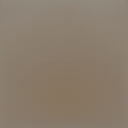

In [96]:

from torchvision.transforms import functional as F

F.to_pil_image(recon_img[15])

In [15]:

from torchvision.transforms import functional as F

F.to_pil_image(img[15])

NameError: name 'img' is not defined

# Other models

In [69]:
from torch import nn
import torch.optim as optim

In [10]:
# print (len(train_dl))
# for i, j in train_dl:
#     print (np.shape(i))
#     print (np.shape(j))

In [192]:
# Regression Model

class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv1d(17, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm1d(64),  # Batch Normalization layer after ReLU
            nn.MaxPool1d(kernel_size=2, stride=2),

            nn.Conv1d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm1d(128),  # Batch Normalization layer after ReLU
            nn.MaxPool1d(kernel_size=2, stride=2),
        )

        self.linear_layers = nn.Sequential(
            nn.Linear(128 * 25, 512),  # The size here depends on your input size
            nn.ReLU(),
            nn.BatchNorm1d(512),  # Batch Normalization layer after ReLU

            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),  # Batch Normalization layer after ReLU

            nn.Linear(256, 3 * 244 * 244),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        x = x.view(-1, 3, 244, 244)
        return x


model = RegressionModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10000
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
    running_loss = 0.0
    
    inputs, targets = next(iter(train_dl))
    inputs = inputs.to(device)
    targets = targets.to(device)
    
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
    
    epoch_loss = running_loss / len(train_dl)
    if epoch % 500 == 0: 
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.5f}")

Epoch [1/10000], Loss: 0.00467
Epoch [501/10000], Loss: 0.00422
Epoch [1001/10000], Loss: 0.00301
Epoch [1501/10000], Loss: 0.00332
Epoch [2001/10000], Loss: 0.00361
Epoch [2501/10000], Loss: 0.00338
Epoch [3001/10000], Loss: 0.00360
Epoch [3501/10000], Loss: 0.00282
Epoch [4001/10000], Loss: 0.00286
Epoch [4501/10000], Loss: 0.00260
Epoch [5001/10000], Loss: 0.00383
Epoch [5501/10000], Loss: 0.00343
Epoch [6001/10000], Loss: 0.00301
Epoch [6501/10000], Loss: 0.00290
Epoch [7001/10000], Loss: 0.00260
Epoch [7501/10000], Loss: 0.00252
Epoch [8001/10000], Loss: 0.00268
Epoch [8501/10000], Loss: 0.00229
Epoch [9001/10000], Loss: 0.00213
Epoch [9501/10000], Loss: 0.00226


In [193]:
def denormalize(tensor, mean, std):
    tensor_copy = tensor.clone().detach()  # make a copy of the tensor
    for t, m, s in zip(tensor_copy, mean, std):
        t.mul_(s).add_(m)  # denormalize
    return tensor_copy

# Normalization mean and std for ImageNet
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Denormalize


In [287]:
d = 8

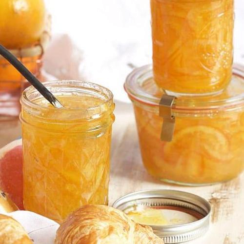

In [288]:
from torchvision.transforms import functional as F

output = denormalize(targets[d], mean, std)
F.to_pil_image(output)

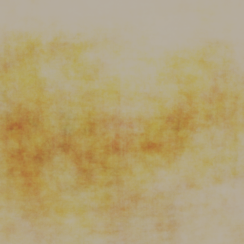

In [289]:
output2 = denormalize(outputs[d], mean, std)
F.to_pil_image(output2)

In [259]:
test_inputs, test_targets = next(iter(test_dl))
test_inputs = test_inputs.to(device)
test_targets = test_targets.to(device)
test_outputs = model(test_inputs)

In [329]:
d = 5


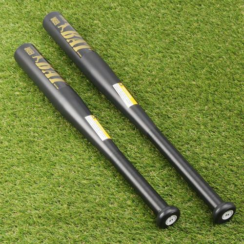

In [330]:


test_output = denormalize(test_targets[d], mean, std)
F.to_pil_image(test_output)

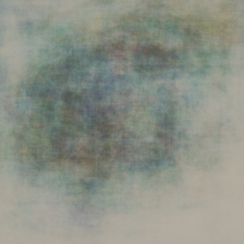

In [331]:
test_output2 = denormalize(test_outputs[d], mean, std)
F.to_pil_image(test_output2)

# Testing new VAE


In [180]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()

        self.layers = nn.Sequential(
            nn.Conv1d(17, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.MaxPool1d(kernel_size=2, stride=2),

            nn.Conv1d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.MaxPool1d(kernel_size=2, stride=2),

            nn.Flatten(),
            nn.Linear(128 * 25, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
        )

    def forward(self, x):
        return self.layers(x)
    
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()

        self.layers = nn.Sequential(
            # Fully-connected layer
            nn.Linear(512, 256 * 61 * 61),  # Resize the output to feed into ConvTranspose2d
            nn.ReLU(),
            nn.BatchNorm1d(256 * 61 * 61),

            # Reshape from (batch_size, 256 * 61 * 61) to (batch_size, 256, 61, 61)
            nn.Unflatten(1, (256, 61, 61)),

            # Convolutional layers
            nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),

            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),

            nn.ConvTranspose2d(64, 3, kernel_size=3, stride=1, padding=1),  # Output (3, 244, 244)
            nn.Tanh(),
        )

    def forward(self, x):
        return self.layers(x)
    
    
class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()

        self.encoder = Encoder()
        self.decoder = Decoder()

    def forward(self, x):
        x = self.encoder(x)
        return self.decoder(x)

In [183]:
model = VAE()
criterion = nn.MSELoss()  # Assuming a regression problem; change if needed
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 50
# For each epoch...
for epoch in range(num_epochs):
    # For each batch in the training data...
    for i, (inputs, targets) in enumerate(train_dl):
        # Forward pass
        inputs = inputs.to(device)
        targets = targets.to(device)
        outputs = model(inputs)
        
        # Compute the loss
        loss = criterion(outputs, targets)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Backward pass
        loss.backward()
        
        # Update the weights
        optimizer.step()
        
        # Print loss for this batch
        print(f'Epoch {epoch+1}/{num_epochs}, Batch {i+1}/{len(train_dl)}, Loss: {loss.item()}')

Epoch 1/50, Batch 1/332, Loss: 1.8478095531463623
Epoch 1/50, Batch 2/332, Loss: 1.9221951961517334
Epoch 1/50, Batch 3/332, Loss: 2.1357407569885254
Epoch 1/50, Batch 4/332, Loss: 2.2692904472351074
Epoch 1/50, Batch 5/332, Loss: 2.1102821826934814
Epoch 1/50, Batch 6/332, Loss: 1.6770673990249634
Epoch 1/50, Batch 7/332, Loss: 2.1487276554107666
Epoch 1/50, Batch 8/332, Loss: 1.7459205389022827
Epoch 1/50, Batch 9/332, Loss: 1.9736510515213013
Epoch 1/50, Batch 10/332, Loss: 2.0266971588134766
Epoch 1/50, Batch 11/332, Loss: 1.6581313610076904
Epoch 1/50, Batch 12/332, Loss: 1.5524014234542847
Epoch 1/50, Batch 13/332, Loss: 1.6970025300979614
Epoch 1/50, Batch 14/332, Loss: 1.8287527561187744
Epoch 1/50, Batch 15/332, Loss: 1.7678545713424683
Epoch 1/50, Batch 16/332, Loss: 2.0457398891448975
Epoch 1/50, Batch 17/332, Loss: 1.7934362888336182
Epoch 1/50, Batch 18/332, Loss: 1.651526689529419
Epoch 1/50, Batch 19/332, Loss: 1.5589529275894165
Epoch 1/50, Batch 20/332, Loss: 1.5279991

KeyboardInterrupt: 

In [184]:
d = 5

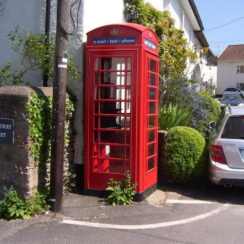

In [185]:
from torchvision.transforms import functional as F

output = denormalize(targets[d], mean, std)
F.to_pil_image(output)

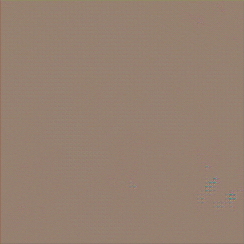

In [186]:
output2 = denormalize(outputs[d], mean, std)
F.to_pil_image(output2)

In [187]:
test_inputs, test_targets = next(iter(test_dl))
test_inputs = test_inputs.to(device)
test_targets = test_targets.to(device)
test_outputs = model(test_inputs)

RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same

In [ ]:
d = 5 

In [ ]:
test_output = denormalize(test_targets[d], mean, std)
F.to_pil_image(test_output)

In [ ]:
test_output2 = denormalize(test_outputs[d], mean, std)
F.to_pil_image(test_output2)

In [103]:
test_inputs, test_targets = next(iter(val_dl))
test_inputs = test_inputs.to(device)
test_targets = test_targets.to(device)
test_outputs = model(test_inputs)

In [151]:
d = 505

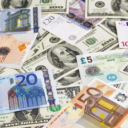

In [152]:
F.to_pil_image(test_targets[d])

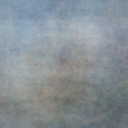

In [153]:
F.to_pil_image(test_outputs[d])

In [141]:

    

# class Generator(nn.Module):
#     def __init__(self, latent_dim, output_dim):
#         super(Generator, self).__init__()
#         self.latent_dim = latent_dim
#         self.output_dim = output_dim

#         self.model = nn.Sequential(
#             nn.Linear(latent_dim, 128),
#             nn.ReLU(),
#             nn.Linear(128, 256),
#             nn.ReLU(),
#             nn.Linear(256, output_dim[0] * output_dim[1] * output_dim[2]),
#             nn.Tanh()
#         )

#     def forward(self, x):
#         x = self.model(x)
#         x = x.view(-1, self.output_dim[0], self.output_dim[1], self.output_dim[2])
#         return x
    
    
# # Discriminator Model
# class Discriminator(nn.Module):
#     def __init__(self, input_dim):
#         super(Discriminator, self).__init__()
#         self.input_dim = input_dim

#         self.model = nn.Sequential(
#             nn.Linear(input_dim, 256),
#             nn.LeakyReLU(0.2),
#             nn.Linear(256, 128),
#             nn.LeakyReLU(0.2),
#             nn.Linear(128, 1),
#             nn.Sigmoid()
#         )

#     def forward(self, x):
#         x = x.view(-1, self.input_dim)
#         x = self.model(x)
#         return x



# inputs, outputs = next(iter(train_dl))
# inputs = inputs.to(device)
# outputs = outputs.to(device)
# print (np.shape(inputs))
# print (np.shape(outputs))

# batch_size = 64


# latent_dim = 100
# output_dim = [3, 128, 128]
# generator = Generator(latent_dim, output_dim)
# discriminator = Discriminator(output_dim[0] * output_dim[1] * output_dim[2])

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# generator.to(device)
# discriminator.to(device)

# criterion = nn.BCELoss()
# optimizer_G = optim.Adam(generator.parameters(), lr=0.0002)
# optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002)

# num_epochs = 10
# print (inputs.size(0))
# for epoch in range(num_epochs):
#     for i, (inputs, _) in enumerate(train_dl):
#         batch_size = inputs.size(0)
        
        
#         # Adversarial ground truths
#         valid = torch.ones(batch_size, 1).to(device)
#         fake = torch.zeros(batch_size, 1).to(device)

#         # Train Generator
#         optimizer_G.zero_grad()

#         # Generate a batch of samples
#         z = torch.randn(batch_size, latent_dim).to(device)
#         generated_samples = generator(z)

#         # Loss for generator
#         g_loss = criterion(discriminator(generated_samples), valid)

#         # Update generator weights
#         g_loss.backward()
#         optimizer_G.step()

#         # Train Discriminator
#         optimizer_D.zero_grad()
        
#         # Measure discriminator's ability to classify real samples
#         real_loss = criterion(discriminator(inputs.view(-1, 3, 128, 128)), valid)




#         # Measure discriminator's ability to classify fake samples
#         fake_loss = criterion(discriminator(generated_samples.detach()), fake)

#         # Total discriminator loss
#         d_loss = (real_loss + fake_loss) / 2

#         # Update discriminator weights
#         d_loss.backward()
#         optimizer_D.step()

#         # Print the loss information
#         if (i + 1) % 10 == 0:
#             print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{i+1}/{len(dataloader)}], "
#                   f"D_loss: {d_loss.item():.4f}, G_loss: {g_loss.item():.4f}")


In [14]:
batch_size = 32
num_epochs = 100
# Define the Generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(4 * 17 * 100, 128 * 128 * 3),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.model(x)
        return x.view(x.size(0), 3, 128, 128)

# Define the Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(3 * 128 * 128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.model(x)
        return x

# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create the GAN
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Define the loss function and optimizers
criterion = nn.BCELoss()
generator_optimizer = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Define the training loop
# def train_gan(dataloader, generator, discriminator, criterion, generator_optimizer, discriminator_optimizer, num_epochs):
for epoch in range(num_epochs):
    for i, (eeg_inputs, real_images) in enumerate(train_dl):
        eeg_inputs = eeg_inputs.to(device)
        real_images = real_images.to(device)
        batch_size = real_images.size(0)

        # Train the discriminator
        discriminator.zero_grad()
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # Real images
        real_outputs = discriminator(real_images)
        real_loss = criterion(real_outputs, real_labels)

        # Fake images
        noise = torch.randn(batch_size, 4 * 17 * 100).to(device)
        fake_images = generator(noise)
        fake_outputs = discriminator(fake_images.detach())
        fake_loss = criterion(fake_outputs, fake_labels)

        # Total discriminator loss
        discriminator_loss = real_loss + fake_loss
        discriminator_loss.backward()
        discriminator_optimizer.step()

        # Train the generator
        generator.zero_grad()
        fake_outputs = discriminator(fake_images)
        generator_loss = criterion(fake_outputs, real_labels)
        generator_loss.backward()
        generator_optimizer.step()

        # Print training progress
        if (i + 1) % 100 == 0:
            print(f"Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_dl)}], "
                  f"Discriminator Loss: {discriminator_loss.item():.4f}, "
                  f"Generator Loss: {generator_loss.item():.4f}")

# Set the hyperparameters and start training



OutOfMemoryError: CUDA out of memory. Tried to allocate 1.25 GiB (GPU 0; 3.82 GiB total capacity; 1.28 GiB already allocated; 709.00 MiB free; 2.50 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
# train_gan(train_dl, generator, discriminator, criterion, generator_optimizer, discriminator_optimizer, num_epochs)


In [ ]:
from torchvision.transforms import functional as F

F.to_pil_image(fake_images[1])

In [ ]:
F.to_pil_image(real_images[1])

In [67]:
class VAE(nn.Module):
    def __init__(self, latent_dim):
        super(VAE, self).__init__()

        # Encoder layers
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
        )

        # Decoder layers
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, kernel_size=4, stride=2, padding=1),
            nn.Sigmoid(),
        )

        # Latent space layers
        self.fc_mu = nn.Linear(128 * 8 * 8, latent_dim)
        self.fc_logvar = nn.Linear(128 * 8 * 8, latent_dim)

    def encode(self, x):
        x = self.encoder(x)
        x = x.view(x.size(0), -1)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mu + eps * std
        return z

    def decode(self, z):
        z = z.view(z.size(0), 128, 8, 8)
        x_recon = self.decoder(z)
        return x_recon

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        x_recon = self.decode(z)
        return x_recon, mu, logvar
    
# Define the loss function
def vae_loss(recon_x, x, mu, logvar):
    recon_loss = nn.MSELoss()(recon_x, x)
    kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return recon_loss + kl_loss


latent_dim = 32
vae = VAE(latent_dim)
learning_rate = 0.001
optimizer = optim.Adam(vae.parameters(), lr=learning_rate)
num_epochs = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vae.to(device)

VAE(
  (encoder): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (7): ReLU()
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): ConvTranspose2d(32, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
    (6): ConvTranspose2d(16, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (7): Sigmoid()
  )
  (fc_mu): Linear(in_features=8192, out_features=32, bias=True)
  (fc_logvar): Linear(in_features=8192, out_features=32, bias=True)
)

In [68]:
for epoch in range(num_epochs):
    for i, (eeg_inputs, real_images) in enumerate(train_dl):
        eeg_inputs = eeg_inputs.to(device)
        real_images = real_images.to(device)
        batch_size = real_images.size(0)
        # Forward pass
        recon_outputs, mu, logvar = vae(inputs)

        # Calculate loss
        loss = vae_loss(recon_outputs, outputs, mu, logvar)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print progress
        if (batch_idx + 1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(data_loader)}], Loss: {loss.item():.4f}")

# After training, you can use the VAE to generate new samples
z_sample = torch.randn(1, latent_dim)
generated_sample = vae.decode(z_sample)

RuntimeError: Given groups=1, weight of size [16, 3, 3, 3], expected input[1, 16, 17, 100] to have 3 channels, but got 16 channels instead